<a href="https://colab.research.google.com/github/deniskaanikov/ML/blob/main/%D0%BB%D0%B0%D0%B1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Полносвязная сеть

In [ ]:
#импорт библиотек
import pandas as pd
import numpy as np
import scipy
from io import IncrementalNewlineDecoder
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from tensorflow.python.keras.optomizers import Adam, RMSprpp

from PIL import Image

from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
#разделение на тестовую и обучающую
(X_train_org, y_train_org), (X_test_org, y_test_org) = mnist.load_data()

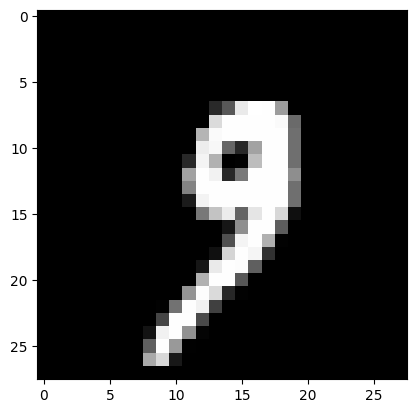

In [ ]:
#Посмотрим на случайное 1000-е изображение
plt.imshow(Image.fromarray(X_test_org[1000]).convert('RGBA'))
plt.show()

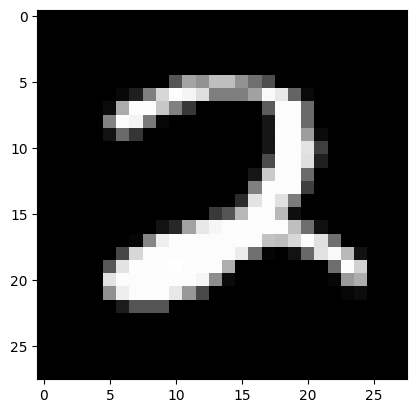

In [ ]:
#Посмотрим на случайное 1000-е изображение
plt.imshow(Image.fromarray(X_test_org[888]).convert('RGBA'))
plt.show()

In [ ]:
#Проведем преобразование данных
X_train=X_train_org.reshape(60000, 784)
X_test=X_test_org.reshape(10000, 784)

In [ ]:
#Проведем нормализацию данных
X_train=X_train.astype('float32')
X_train=X_train/255

In [ ]:
#Применим OnehotEncoder
y_train=utils.to_categorical(y_train_org,10)
y_test=utils.to_categorical(y_test_org,10)
print(y_test[1000])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#Создадим нейронную сеть для множественной классификации
model=Sequential()

# Входной полносвязный слой
model.add(Dense(400, input_dim=784, activation='relu'))
model.add(Dropout(0.2)) #для предотвращения переобучения
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Проведем компиляцию модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
#Обучим модель
n=30000
history=model.fit(X_train[:n],
                  y_train[:n],
                  batch_size=250,
                  epochs=30,
                  validation_data=(X_train[n:], y_train[n:]),
                  verbose=1)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7533 - loss: 0.8418 - val_accuracy: 0.9378 - val_loss: 0.2080
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9417 - loss: 0.1970 - val_accuracy: 0.9563 - val_loss: 0.1447
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9607 - loss: 0.1321 - val_accuracy: 0.9614 - val_loss: 0.1249
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9692 - loss: 0.0991 - val_accuracy: 0.9647 - val_loss: 0.1132
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9743 - loss: 0.0804 - val_accuracy: 0.9679 - val_loss: 0.1045
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9803 - loss: 0.0630 - val_accuracy: 0.9686 - val_loss: 0.1054
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 0.9700 - val_loss: 0.1042
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9841 - loss: 0.0471 - val_accu

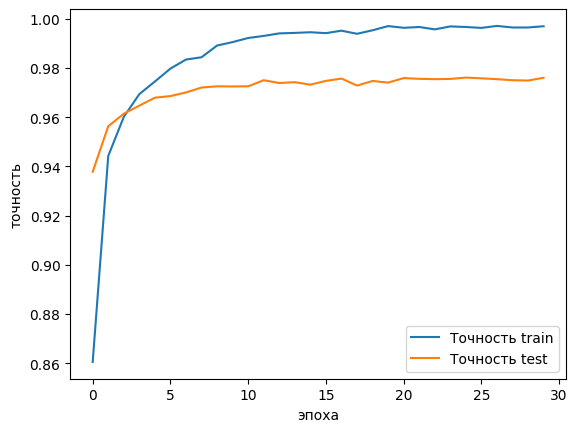

In [ ]:
#визуализация
plt.plot(history.history['accuracy'],
         label='Точность train')
plt.plot(history.history['val_accuracy'],
         label='Точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()
#хорошая точность модели, для обучающей выборки точность выше

Сверточная сеть

In [ ]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import scipy
from io import IncrementalNewlineDecoder
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from tensorflow.python.keras.optomizers import Adam, RMSprpp
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Подготовим данные для обучения сети
(X_train_org, y_train_org), (X_test_org, y_test_org) = mnist.load_data()
y_train=utils.to_categorical(y_train_org, 10)
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Проведем преобразование данных
X_train=X_train_org.reshape(X_train_org.shape[0], 28, 28, 1)
X_test=X_test_org.reshape(X_test_org.shape[0], 28, 28, 1)

In [ ]:
#Нейронная сеть для множественной классификации
model=Sequential()

# Входной сверточный слой
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Проведем компиляцию модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
#Обучим модель
n=30000
history=model.fit(X_train[:n],
                  y_train[:n],
                  batch_size=250,
                  epochs=30,
                  validation_data=(X_train[n:], y_train[n:]),
                  verbose=1)


Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.5906 - loss: 7.5257 - val_accuracy: 0.9132 - val_loss: 0.3389
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.8880 - loss: 0.3780 - val_accuracy: 0.9505 - val_loss: 0.2086
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.9330 - loss: 0.2205 - val_accuracy: 0.9591 - val_loss: 0.1685
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.9515 - loss: 0.1565 - val_accuracy: 0.9658 - val_loss: 0.1476
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.9620 - loss: 0.1191 - val_accuracy: 0.9694 - val_loss: 0.1442
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.9672 - loss: 0.1003 - val_accuracy: 0.9715 - val_loss: 0.1360
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.9723 - loss: 0.0871 - val_accuracy: 0.9727 - val_loss: 0.1303
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9771 - loss: 0

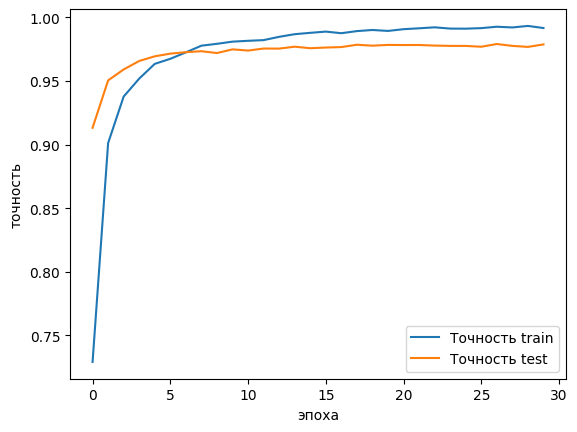

In [ ]:
#Визуализируем результат
plt.plot(history.history['accuracy'],
         label='Точность train')
plt.plot(history.history['val_accuracy'],
         label='Точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()
#хорошая точность модели, для обучающей выборки точность выше, однако изначально точность ниже